In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [3]:
data = pd.read_csv(r"D:\Anaconda\book_reviews_sample.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [9]:
#Cleaninig data
data["cleaned_data"] = data.apply(lambda x : re.sub(r"[^\w\s]", " ",x["reviewText"].lower()),axis=1)

In [10]:
data.head()

,index,reviewText,rating,cleaned_data
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [17]:
# Sentiment Analysis using Vader
vader_sentiment = SentimentIntensityAnalyzer()
data["vader_sentiment_score"] = data["cleaned_data"].apply(lambda review : vader_sentiment.polarity_scores(review)["compound"])
data.head()

,index,reviewText,rating,cleaned_data,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [19]:
bins = [-1, -0.1, 0.1, 1]
names = ("Negative","Neutral", "Positive")
data["sentiment_label"]= pd.cut(data["vader_sentiment_score"], bins, labels = names)

<Axes: xlabel='sentiment_label'>

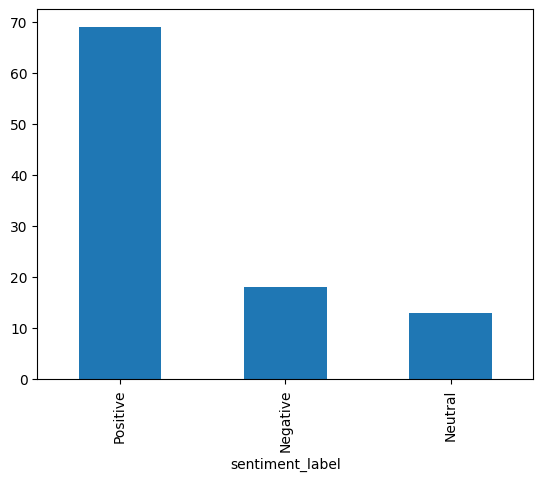

In [23]:
data["sentiment_label"].value_counts().plot.bar()

In [30]:
# Sentiment Analysis using Transformer
sentiment_analysis = pipeline("sentiment-analysis")
data["transformer_sentiment_score"] = data["cleaned_data"].apply(lambda review : sentiment_analysis(review)[0]["label"])
data.head()[:10]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,index,reviewText,rating,cleaned_data,vader_sentiment_score,sentiment_label,transformer_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the diffe...,0.7684,Positive,POSITIVE
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate wha...,0.9325,Positive,POSITIVE
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read i...,0.6740,Positive,NEGATIVE
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps gettin...,0.6652,Positive,NEGATIVE
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,Negative,NEGATIVE


<Axes: xlabel='transformer_sentiment_score'>

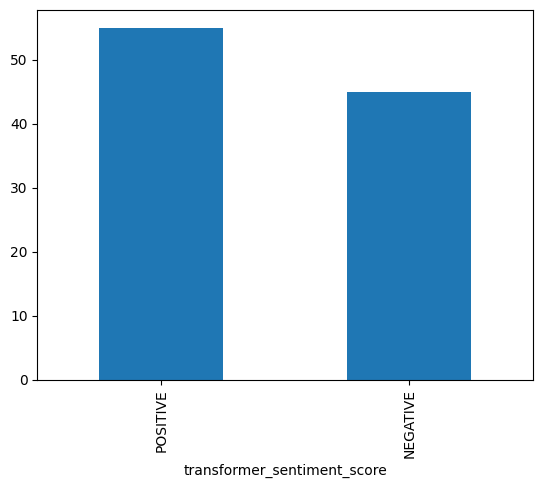

In [28]:
data["transformer_sentiment_score"].value_counts().plot.bar()